In [1]:
from lightning import RetinaVesselSegmentation
from pytorch_lightning import Trainer
from data_interface import DriveDataModule
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import wandb

In [2]:
img_size = 448
crop_size = 448
batch_size = 4
num_workers = 8
max_epoches = 200
is_fast_dev_run = False
is_wandb = True

loss_type = 'Dice'
lr = 1e-4

In [3]:
if is_wandb:
    wandb_logger = WandbLogger(project='retina_vessel_segmentation', name=f'resUNet2_{loss_type}_{img_size}')


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: vetitk (use `wandb login --relogin` to force relogin)


In [4]:
model = RetinaVesselSegmentation(lr=lr, loss_type=loss_type, img_size=img_size)
trainer = Trainer(fast_dev_run=is_fast_dev_run, max_epochs=max_epoches, logger=wandb_logger, log_every_n_steps=4, callbacks=[
                  EarlyStopping(monitor='val_loss', patience=10, mode='min')], gpus=1)
data_module = DriveDataModule(
    data_dir='data', batch_size=batch_size, numworkers=num_workers, img_size=img_size, transform_angle=(-30, 30), crop_size=crop_size)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [5]:
try:
    trainer.fit(model, data_module)
    trainer.test(model, data_module)
except Exception as e:
    print(e)
finally:
    pass

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | ResUnetVariant2 | 13.0 M
1 | loss  | DiceLoss        | 0     
------------------------------------------
13.0 M    Trainable params
0         Non-trainable params
13.0 M    Total params
52.172    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_dice_coeff      │    0.7592964768409729     │
│      test_iou_score       │    0.6119914650917053     │
│         test_loss         │    0.24887603521347046    │
│         train_acc         │    0.8897331357002258     │
└───────────────────────────┴───────────────────────────┘

In [6]:
wandb.finish()

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_dice_coeff,▁
test_iou_score,▁
test_loss,▁
train_acc,▁▇██████████████████████████████████████
train_dice_coeff,▁▂▃▄▆▇▇▆▇▇▇▇█▇▇████████▇█▇██▇████████▇██
train_iou_score,▁▂▃▄▅▇▇▅▇▇▇▇▇▇▇████████▇█▇▇█▇█████▇█▇▇██
train_loss,██▆▆▄▃▂▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▂▁▂▁▁▂▁▁▁▁▁▁▁▁▂▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
val_dice_coeff,▃▃▁▁▃▆▆▇▇▇▇█████████████████████████████
val_iou_score,▂▂▁▁▂▅▆▇▇▇▇▇▇███████████████████████████


In [7]:
data_module = DriveDataModule(
    data_dir='data', batch_size=1, numworkers=num_workers, img_size=img_size, transform_angle=(-20, 21))
data_module.setup()

In [8]:
from torchvision.transforms import ToPILImage

tensor([[[[0.3226, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.5089, 0.9490, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]]])


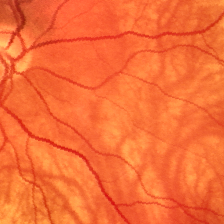

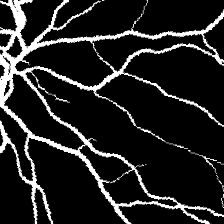

In [9]:
dataloader = data_module.train_dataloader()
for i, batch in enumerate(dataloader):
    print(batch[1])
    display(ToPILImage()(batch[0].squeeze(0)))
    display(ToPILImage()(batch[1].squeeze(0)))
    break